In [1]:
#基本库
import numpy as np
#画图库
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
##导入逻辑回归模型函数
from sklearn.linear_model import LogisticRegression

In [4]:
# 构造数据集
X=np.array([[-1,-2],[-2,-1],[-3,-2],[1,3],[2,1],[3,2]])
y=np.array([0,0,0,1,1,1])

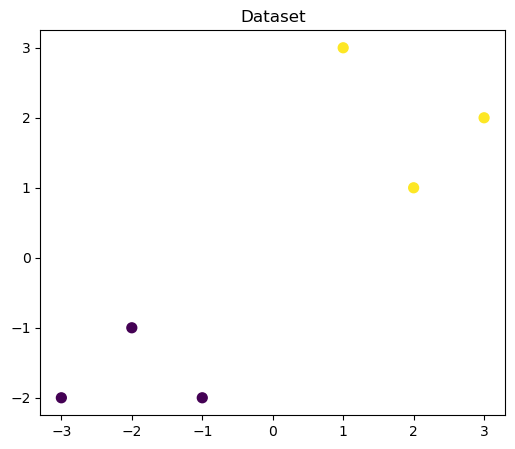

In [5]:
#可视化样本
fig=plt.figure(figsize=(6,5))
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='viridis')
plt.title('Dataset')
plt.show()

In [7]:
#创建分类器
lr=LogisticRegression()
lr.fit(X,y)#拟合数据点
#查看w
print('the weight(w) of Logistic Regression:',lr.coef_)
#查看w0
print("the intercept(w0) of Logistic Regression:",lr.intercept_)

the weight(w) of Logistic Regression: [[0.73455784 0.69539712]]
the intercept(w0) of Logistic Regression: [-0.13139986]


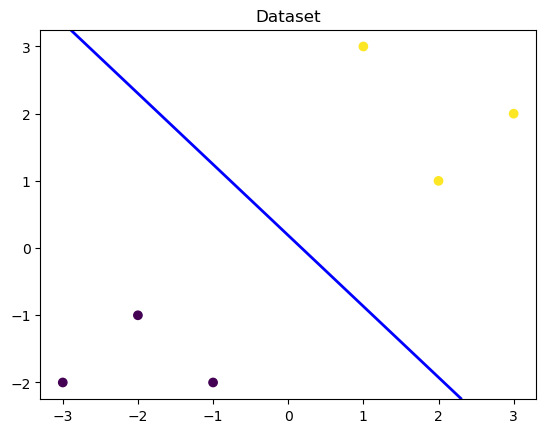

In [13]:
# 可视化决策边界
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.title('Dataset')

nx,ny=200,100#指定点个数 
x_min,x_max=plt.xlim()#x轴的边界
y_min,y_max=plt.ylim()#y轴的边界

# 得到所有可能坐标点组合，以linespace生成的数据点
x_grid,y_grid=np.meshgrid(np.linspace(x_min,x_max,nx),np.linspace(y_min,y_max,ny))
# ravel()将n*m的数组转换为(n*m,1)，np.c_([],[])按行连接两个矩阵,
z_proba=lr.predict_proba(np.c_[x_grid.ravel(),y_grid.ravel()])# 由此得到所有可能坐标点输入后的概率值, z_proba:(20000,2)
z_proba = z_proba[:, 1].reshape(x_grid.shape)
# 绘制等高线，找到所有经过逻辑回归后值相同的点，取中间的等高线
plt.contour(x_grid,y_grid,z_proba,1,linewidths=2.,colors='blue')
plt.show()

In [14]:
#分类器预测

# 新的预测点
x_fearures_new1 = np.array([[0, -1]])
x_fearures_new2 = np.array([[1, 2]])
# 预测分类
y_label_new1_predict=lr.predict(x_fearures_new1)
y_label_new2_predict=lr.predict(x_fearures_new2)
print('The New point 1 predict class:\n',y_label_new1_predict)  # [0]
print('The New point 2 predict class:\n',y_label_new2_predict)  # 

# 预测分类概率
y_label_new1_predict_proba=lr.predict_proba(x_fearures_new1)
y_label_new2_predict_proba=lr.predict_proba(x_fearures_new2)
print('The New point 1 predict Probability of each class:\n',y_label_new1_predict_proba)
print('The New point 2 predict Probability of each class:\n',y_label_new2_predict_proba)


The New point 1 predict class:
 [0]
The New point 2 predict class:
 [1]
The New point 1 predict Probability of each class:
 [[0.69567724 0.30432276]]
The New point 2 predict Probability of each class:
 [[0.11983936 0.88016064]]
